In [1]:
from scipy import stats 
import matplotlib.pyplot as plt
from torch.nn import Embedding
import numpy as np
import torch
from patbert.features import utils
from patbert.features import tokenizer
import pandas as pd
import string
import importlib
from patbert.common import common
importlib.reload(common)

d:\Programme\miniconda3\envs\patbert\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'patbert.common.common' from 'd:\\phd\\pipelines\\static_patbert\\patbert\\patbert\\common\\common.py'>

In [ ]:
codes = []
with open("..\\..\\data\\medical\\SKScomplete.txt") as f:
    for line in f:
        codes.append(line.split(' ')[0])
codes = set(codes)
icd_codes =[c.strip('dia') for c in codes if c.startswith('dia')]
atc_codes = [c.strip('atc') for c in codes if c.startswith('atc')]

In [ ]:
ls = ['ab', 'cd', 'ef']
code = 'abc'
bool_ls =[code.startswith(l) for l in ls]
bool_ls.index(True)

0

In [ ]:
from patbert.common import medical
import importlib
import pickle as pkl
importlib.reload(medical)
from patbert.features import embeddings
importlib.reload(embeddings)

<module 'patbert.features.embeddings' from 'c:\\users\\fjn197\\phd\\projects\\pipelines\\patbert_static\\patbert\\patbert\\features\\embeddings.py'>

In [ ]:
sks = medical.SKSVocabConstructor()
icd = sks.get_icd()
atc = sks.get_atc()
codes_test = [icd[0], atc[0], icd[1], '<BIRTHYEAR>1950', '<BIRTHMONTH>4']

In [ ]:
'<adfbjks>1234'.split('>')[0]

'1234'

In [ ]:
emb = embeddings.StaticHierarchicalEmbedding(10)
emb.get_ids_from_codes(codes_test)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [46]:
alpha = string.ascii_uppercase
long_codes = [c for c in sks.get_icd() if len(c)>4]
[c for c in long_codes if c[4].isupper()]

['DU26D0',
 'DU06D5',
 'DU44D6',
 'DU08D6',
 'DU28D5',
 'DU17D2',
 'DU33D0',
 'DU39D4',
 'DU33D6',
 'DU22D5',
 'DU14D5',
 'DU39D5',
 'DU32D0',
 'DU19DX',
 'DU23DX',
 'DU30D1',
 'DU23D3',
 'DU20D0',
 'DU03D5',
 'DU37D0',
 'DU11D4',
 'DU33D3',
 'DU02D0',
 'DU21DX',
 'DU27DX',
 'DU35D3',
 'DU16D6',
 'DU05D1',
 'DU19D0',
 'DU35DX',
 'DU17D6',
 'DU30D3',
 'DU34D6',
 'DU36D2',
 'DU28D4',
 'DU26D1',
 'DU27D6',
 'DU27D0',
 'DU30DX',
 'DU10D3',
 'DU11D2',
 'DU15D0',
 'DU24D2',
 'DU13D5',
 'DU05DX',
 'DU34DX',
 'DU01DX',
 'DU12D1',
 'DU06D6',
 'DU42D2',
 'DU06DX',
 'DU05D0',
 'DU34D3',
 'DU33D2',
 'DVAXX',
 'DU29D6',
 'DU01D3',
 'DU02D6',
 'DU21D3',
 'DU39D6',
 'DU38D6',
 'DU30D2',
 'DU29D4',
 'DU08D4',
 'DU37DX',
 'DU02D4',
 'DU42D4',
 'DU15DX',
 'DU42DX',
 'DU13DX',
 'DU25DX',
 'DU03D4',
 'DU34D1',
 'DU27D5',
 'DU29D0',
 'DU21D2',
 'DU36D3',
 'DU32D1',
 'DU30D4',
 'DU19D6',
 'DU23D5',
 'DU33D5',
 'DU11D5',
 'DU16D5',
 'DU22D1',
 'DU09DX',
 'DU09D0',
 'DU28DX',
 'DU28D1',
 'DU42D5',
 'DU28D6',


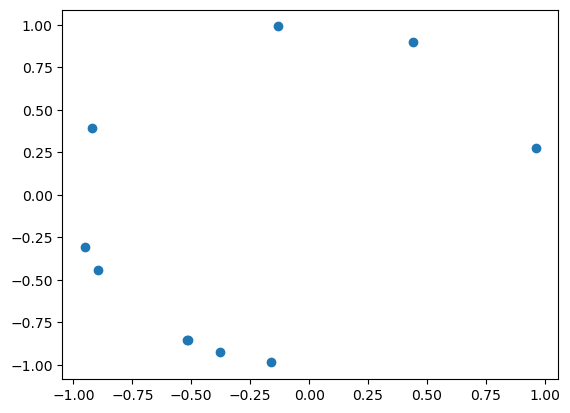

In [76]:
# Generate a 3-dimensional Halton sequence with 1000 points
torch.manual_seed(1)
emb = Embedding(1000, 2, _weight=torch.randn(1000, 2))
points = torch.tensor(np.arange(10))
points = emb(points).detach().numpy()
points = points/np.linalg.norm(points, axis=1, keepdims=True)
plt.scatter(points[:,0], points[:,1])

In [61]:
string.digits

'0123456789'

In [63]:
import string
from patbert.common import medical 
import importlib
import sys
importlib.reload(medical)
def construct_dict(level):
    """Construct a dictionary of ICD and ATC codes at level"""
    vocab = {}
    if level==1:
        for a in string.ascii_uppercase:
            for i in range(10):
                for j in range(10):
                    code = a+str(i)+str(j)
                    vocab['D'+code] = medical.ICD_topic(a+str(i)+str(j))
        for a in 'ABCDJGHLMNPRSV':
            for i in range(10):
                for j in range(10):
                    code = a+str(i)+str(j)
                    vocab['M'+code] = medical.ATC_topic(a)
    
    elif level==2:
        #categories
        #A01
        v1 = construct_dict(1)
        for k in v1:
            # order is important here
            if k.startswith('D'):
                vocab[k] = len(vocab)+1
            elif k.startswith('M'):
                vocab[k] = vocab['D'+k[1:]] #take the disease categories values
    
    elif level==3:
        #subcategories
        # A01A
        v2 = construct_dict(2)
        for k in v2:
            if k.startswith('D'):
                for i in range(10):
                    code = k+str(i)
                    vocab[code] = i+1
            if k.startswith('M'):
                for i in range(10):
                    code = k+str(i)
                    vocab[code] = i+1
    elif level==4:
        v3 = construct_dict(3)
        alphanumeric_ls = list(string.ascii_uppercase)+list(string.digits)
        for k in v3:
            if k.startswith('D'):
                for i, alphanumeric in enumerate(alphanumeric_ls):
                    code = k+alphanumeric
                    vocab[code] = i + 1
            if k.startswith('M'):
                for i, a in enumerate(string.ascii_uppercase):
                    code = k+a
                    vocab[code] = i + 1
        
    return vocab
vocab = construct_dict(4)
vocab

{'DA000A': 1,
 'DA000B': 2,
 'DA000C': 3,
 'DA000D': 4,
 'DA000E': 5,
 'DA000F': 6,
 'DA000G': 7,
 'DA000H': 8,
 'DA000I': 9,
 'DA000J': 10,
 'DA000K': 11,
 'DA000L': 12,
 'DA000M': 13,
 'DA000N': 14,
 'DA000O': 15,
 'DA000P': 16,
 'DA000Q': 17,
 'DA000R': 18,
 'DA000S': 19,
 'DA000T': 20,
 'DA000U': 21,
 'DA000V': 22,
 'DA000W': 23,
 'DA000X': 24,
 'DA000Y': 25,
 'DA000Z': 26,
 'DA0000': 27,
 'DA0001': 28,
 'DA0002': 29,
 'DA0003': 30,
 'DA0004': 31,
 'DA0005': 32,
 'DA0006': 33,
 'DA0007': 34,
 'DA0008': 35,
 'DA0009': 36,
 'DA001A': 1,
 'DA001B': 2,
 'DA001C': 3,
 'DA001D': 4,
 'DA001E': 5,
 'DA001F': 6,
 'DA001G': 7,
 'DA001H': 8,
 'DA001I': 9,
 'DA001J': 10,
 'DA001K': 11,
 'DA001L': 12,
 'DA001M': 13,
 'DA001N': 14,
 'DA001O': 15,
 'DA001P': 16,
 'DA001Q': 17,
 'DA001R': 18,
 'DA001S': 19,
 'DA001T': 20,
 'DA001U': 21,
 'DA001V': 22,
 'DA001W': 23,
 'DA001X': 24,
 'DA001Y': 25,
 'DA001Z': 26,
 'DA0010': 27,
 'DA0011': 28,
 'DA0012': 29,
 'DA0013': 30,
 'DA0014': 31,
 'DA0015': 32

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://medinfo.dk/sks/brows.php?s_nod=0'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

disease_codes = []

for td in soup.find_all('td'):
    if td.text.startswith('D'):
        disease_codes.append(td.text)

print(disease_codes)

In [70]:
sys.getsizeof(vocab)/1e9

0.041943136

In [78]:

import pickle
vocab = torch.load('..\\..\\data\\vocabs\\simulated.pt')
inv_vocab = {v:k for k,v in vocab.items()}
data_tok = torch.load('..\\..\\data\\tokenized\\simulated.pt')
with open('..\\..\\data\\raw\\simulated.pkl', 'rb') as f:
    data = pickle.load(f)






In [79]:
import importlib
importlib.reload(tokenizer)
tok = tokenizer.HierarchicalTokenizerStatic()
tok.batch_encode(data[:3])

[{'pid': 'p_0',
  'birthdate': datetime.datetime(1950, 8, 9, 0, 0),
  'sex': 1,
  'codes': ['<SEP>',
   'L845',
   'L446',
   'DM07714',
   'DV556',
   '<SEP>',
   'MN92I04',
   'DU8331',
   'DY460',
   '<SEP>'],
  'ages': [0, 57, 57, 57, 57, 57, 58, 58, 58, 58],
  'los': [0, 13, 13, 13, 13, 13, 13, 13, 13, 13],
  'visits': [0, 1, 1, 1, 1, 1, 2, 2, 2, 2],
  'abs_pos': [0, -882, -869, -856, -843, -843, -514, -501, -488, -488],
  'values': [1,
   0.5502537430336992,
   0.4261239468194264,
   1.0,
   1.0,
   1,
   1.0,
   1.0,
   1.0,
   1],
  'idx': [2, 9, 10, 11, 12, 2, 13, 14, 15, 2],
  'top_lvl_idx': [2, 9, 9, 10, 10, 2, 11, 10, 10, 2]},
 {'pid': 'p_1',
  'birthdate': datetime.datetime(1967, 7, 25, 0, 0),
  'sex': 1,
  'codes': ['<SEP>',
   'L5',
   '<SEP>',
   'MO46M25',
   'L17',
   'ML30F43',
   '<SEP>',
   'L414',
   '<SEP>',
   'DE36505',
   '<SEP>',
   'MB42B71',
   '<SEP>',
   'DC1432',
   'MT32S02',
   'DE06909',
   '<SEP>',
   'L198',
   '<SEP>',
   'DX0311',
   'L479',
   '<

In [37]:
%%timeit
masked_idxs, labels = utils.random_mask(p1['idx'], vocab,special_tokens=['<SEP>'], mask_prob=.80)

1.02 ms ± 92.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [38]:
%%timeit
masked_idxs_n, labels_n = utils.random_mask_arr(p1['idx'], vocab,special_tokens=['<SEP>'], mask_prob=.80)

1.04 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [59]:
import importlib
importlib.reload(utils)
masked_idxs, labels = utils.random_mask(p1['idx'], vocab,special_tokens=['<SEP>'], 
    mask_prob=.1)
masked_idxs_n, labels_n = utils.random_mask_arr(p1['idx'], vocab,special_tokens=['<SEP>'],
    mask_prob=.80)

print(labels)
print([inv_vocab[m] for m in masked_idxs])

[-100, -100, -100, -100, 32, -100, -100, -100, -100, -100, -100, -100, -100, -100, 40, -100, -100, -100, -100, -100, -100, -100, -100, 47, -100, -100]
['<SEP>', 'DI182', 'MQ60S18', '<SEP>', '<MASK>', 'MC93O44', 'MO70Q73', 'MG26Y31', '<SEP>', 'DK02602', 'L251', 'MK86C11', '<SEP>', 'DT2824', 'MB92H53', 'MU49W97', 'L704', '<SEP>', 'DX07750', 'L520', 'MJ50K90', '<SEP>', 'DG5113', '<MASK>', 'L835', '<SEP>']
